## Python3 notebook to analyze regular smoking habits in usa, 


Created on Tue Feb 27 11:04:38 2018

@author: Oscar J. Avella G.
data used under permission granted by original authors for academic purposes


In [12]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import  matplotlib.pylab as plt
import matplotlib.pyplot as plt1
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
%matplotlib inline
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

### reading the data

In [18]:
health_in = pd.read_csv("tree_addhealth.csv")
healthReady = health_in.dropna()

#### let's check the type of variables contained in the csv file

In [19]:
# checking variable names
print(healthReady.dtypes)


BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object


now by extracting basic statistics on the data we have

In [20]:
healthReady.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


# To explore the data we will proceed as follows:

### I will first start by exploring regular smokers by ethnicity and sex

In [21]:
ethn = ["HISPANIC","WHITE","BLACK","NAMERICAN","ASIAN","BIO_SEX"]
nPlots = len(ethn); nRows=2; nCols=int(round(nPlots/nRows))

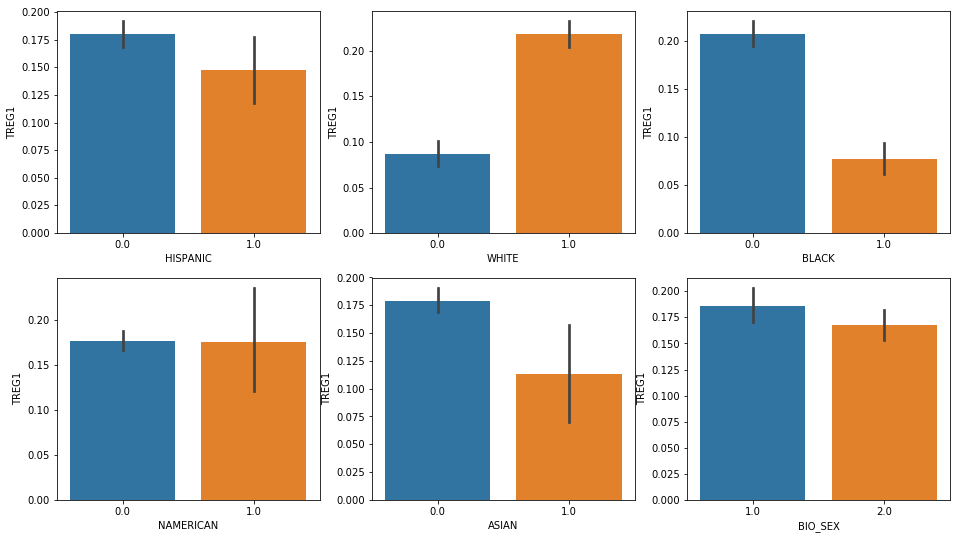

In [22]:
fig,axs = plt1.subplots(nrows=nRows, ncols=nCols,figsize = (16,9))
for i in range(nRows):
    for j in range(nCols):
        sbn.barplot(x = ethn[(i%nPlots)*nCols+j], y = "TREG1", data=healthReady,
                                ax= axs[i][j])


Interestingly, people belonging to some of these ethnic groups seem to be more vulnerable than others, however further analysis is required; in addition we need to explore the existence of potential correlation among ethnicity with other variables.

### For instance, can we say something about a person's age and his/her smoking habits?


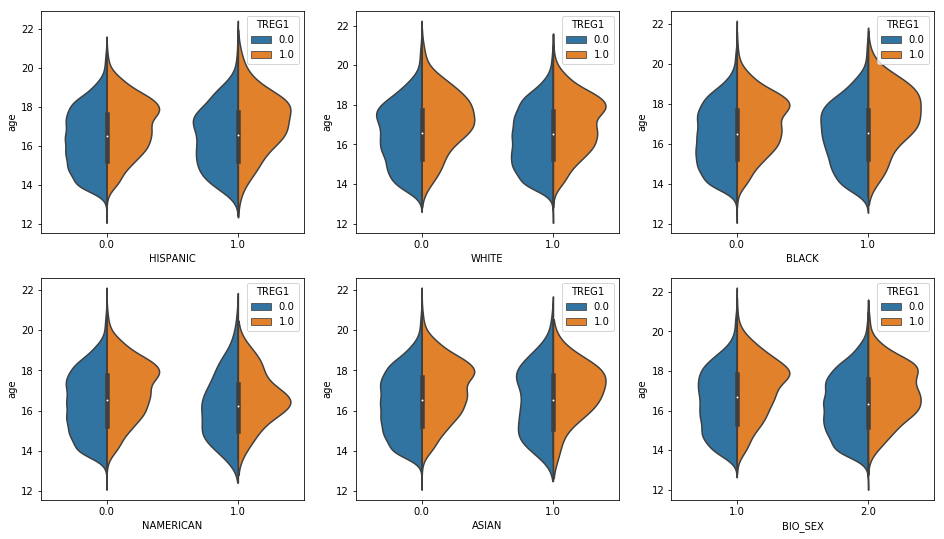

In [23]:
fig2, axs2 = plt1.subplots(nrows=nRows,ncols=nCols,figsize=(16,9))
for i in range(nRows):
   for j in range(nCols):
       sbn.violinplot(x=ethn[(i%nPlots)*nCols+j],y="age",hue="TREG1",
                                 data=healthReady,ax =axs2[i][j],split= True)

Yes!, it seems that the age at which people develop smoking habits has to do with their ethnicity, but maybe due to social influences. let's examine a couple of examples: if we look at hispanic people, most of them develop regular smoking habits around the age of 17 compared to non-hispanics. As a shocking observed aspect First-Nations (Namerican) are very susceptible to develop regular smoking habits at earlier ages than the rest of the studied population.

### So, what about correlation between our predictors, are they strongly/loosely related?

to explore this point, let's find if there is any strong correlation between any two of the variables
in the dataset by checking their correlation. Or if there is any variables that most stronly correlate with the target variable TREG1 = "Have people regular smoking habits?"

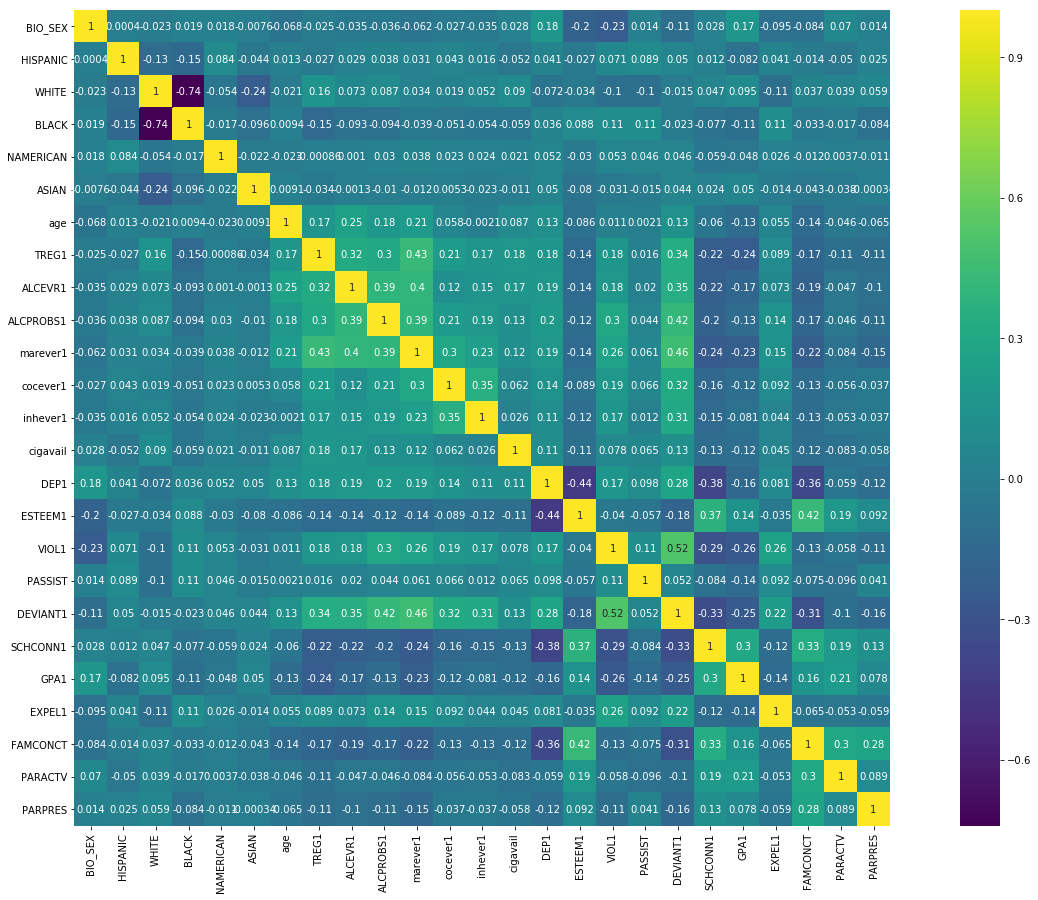

In [24]:
fig=plt1.figure(figsize=(25,15))
vCorr= sbn.heatmap(healthReady.corr(),square=True,annot=True,cmap='viridis')

By focusing on our target variable TREG1, it is easy to see that  the largest correlation corresponds to the predictor marever1 (have you ever used marijuana); and the second largest to DEVIANT1 (social deviant behaviour). It is also strongly "anticorrelated" to the GPA (Grade Point Average). Thus, it may make sense to use those as main predictors to decide what model to use and how to determine the ordering which is indeed the case of the Classification decision tree

## Classification Decision tree

In [25]:
targ = healthReady["TREG1"]

varsPred = healthReady[['marever1','DEVIANT1','GPA1','BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','SCHCONN1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

In [26]:
varsPred1 = healthReady[['age','BIO_SEX','DEVIANT1']]

xTrain, xTest, targTrain, targTest = train_test_split(varsPred1,targ,test_size =0.35)

let's verify that the variable containers have the right size

In [27]:
a = xTrain.shape
b = targTrain.shape
c = xTest.shape
d = targTest.shape
print(a,b,c,d)

(2973, 3) (2973,) (1602, 3) (1602,)


Since this is consistent with the splitting made to train and validate the model, we can continue creating it.

In [28]:
ClassTree = DecisionTreeClassifier(criterion="entropy")
ClassTree.fit(xTrain,targTrain)
targPred = ClassTree.predict(xTest)

confMat = sklearn.metrics.confusion_matrix(targTest,targPred)
accuracy_ = sklearn.metrics.accuracy_score(targTest,targPred)
f0 = sklearn.metrics.f1_score(targTest,targPred)

print("the resulting confusion matrix is:")
print(confMat)
print("accuracy:",accuracy_, "F-score:",f0)

the resulting confusion matrix is:
[[1214  109]
 [ 229   50]]
accuracy: 0.789013732834 F-score: 0.228310502283


The former results confirm that our model was able to make an "acceptable" prediction, although there is room for further improvement. It is shown at looking the confusion matrix and the accuracy, in which 77.5% of the test set was correctly classified, but the F-score is still to low to be considered a good model.

and visualizing the tree we have

In [34]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus
from scipy import misc

rsltTree =  StringIO()
tree.export_graphviz(ClassTree, out_file=rsltTree)
graph1= pydotplus.graph_from_dot_data(rsltTree.getvalue())
graph1.write_png("smokers.png")
# i = misc.imread("smokers.png")
# plt.imshow(i)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.922183 to fit



True

whose result is shown in the image

In [36]:
from IPython.display import Image
Image(filename='smokers.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
